In [3]:
!python test.py

Check if there is GPU(s): True
#================================ Summary of Dataset ==================#
number of training samples:   5460 | number of training fog cases:   103
number of validation samples: 2332 | number of validation fog cases: 31
number of test samples:       2228 | number of test fog cases:       67
#======================================================================#
 We are before starting training ======================
 We are after starting training ======================
========================= 2 
========================= 3 
 We are after starting training ======================
========================= 2 
========================= 3 
 We are after starting training ======================
========================= 2 
========================= 3 
 We are after starting training ======================
========================= 2 
========================= 3 
 We are after starting training ======================
========================= 2 
==============

In [2]:
!echo $HOME

/home/hkamangir


In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import time
import json

from src import dataloader
from models import transformers, engine, configs

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Check if there is GPU(s): {torch.cuda.is_available()}")

Check if there is GPU(s): True


In [4]:
Exp_name  = 'H2'
data_loader_training, data_loader_validate, data_loader_testing = dataloader.return_data_loaders(configs.data_config_dict, configs.get_train_hyperparameter_config, Exp_name)
model      = transformers.VisionTransformer(configs.SparkMET_2D_config(), img_size=32, num_classes=2,).to(device)
loss_func  = torch.nn.NLLLoss() 
optimizer  = optim.Adam(model.parameters(), 
                        lr = configs.get_train_hyperparameter_config['lr'], 
                        weight_decay = configs.get_train_hyperparameter_config['wd'])

#================================ Summary of Dataset ==================#
number of training samples:   5460 | number of training fog cases:   103
number of validation samples: 2332 | number of validation fog cases: 31
number of test samples:       2228 | number of test fog cases:       67
#======================================================================#


In [ ]:
model, loss_stat = engine.train(model, optimizer, loss_func,
                                        configs.get_train_hyperparameter_config,
                                        data_loader_training, 
                                        data_loader_validate, 
                                        Exp_name) 

In [ ]:
list_output, list_inputs, list_attention_maps = engine.predict(model, 
                                                data_loader_training, 
                                                data_loader_validate, 
                                                data_loader_testing, 
                                                Exp_name = Exp_name,)

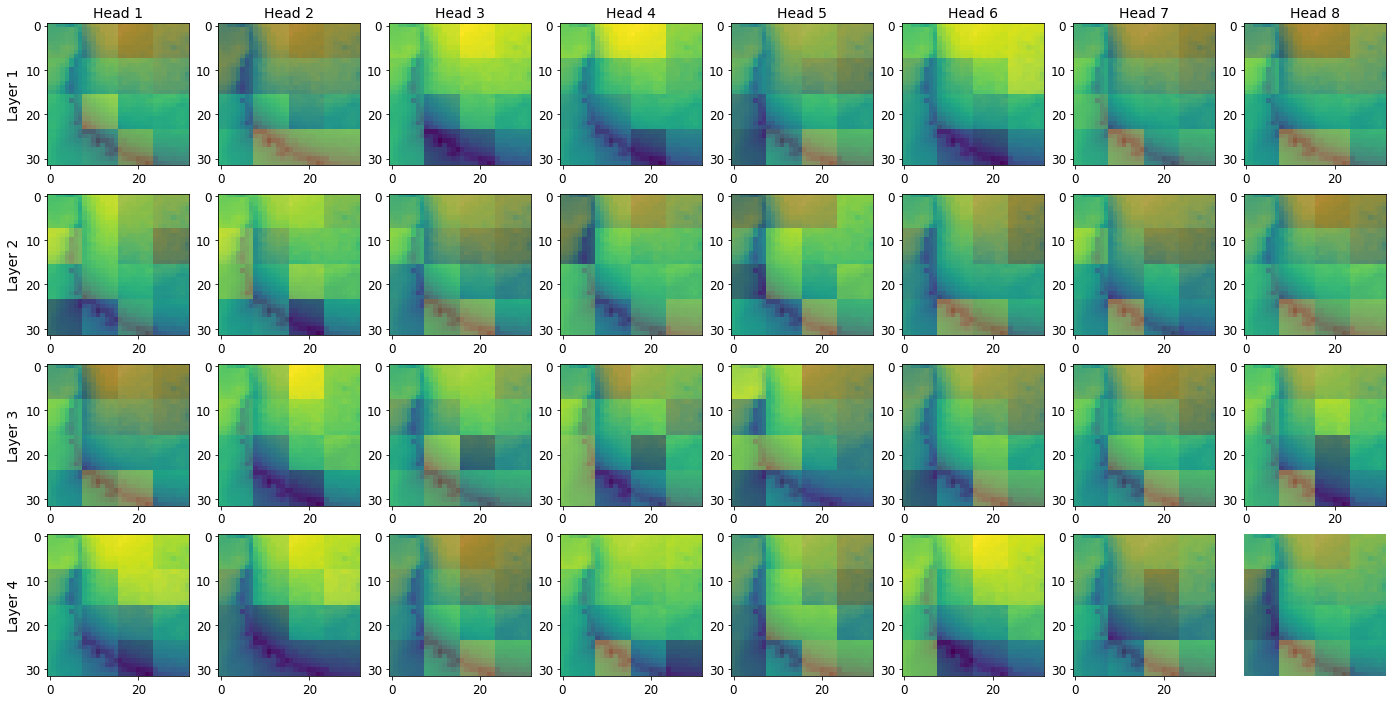

In [65]:
_ = engine.attention_map_visualize(list_output[0], list_inputs[0], list_attention_maps[0], variable = 0, date = '20200116_0600')

### 3D 

In [3]:
Exp_name  = 'Ex_3D_T0'
data_loader_training, data_loader_validate, data_loader_testing = dataloader.return_data_loaders(configs.data_config_dict, configs.get_train_hyperparameter_config, Exp_name)
model      = transformers.VisionTransformer(configs.SparkMET_3D_config(), img_size=32, num_classes=2,).to(device)
loss_func  = torch.nn.NLLLoss() 
optimizer  = optim.Adam(model.parameters(), 
                        lr = configs.get_train_hyperparameter_config['lr'], 
                        weight_decay = configs.get_train_hyperparameter_config['wd'])

#================================ Summary of Dataset ==================#
number of training samples:   5460 | number of training fog cases:   103
number of validation samples: 2332 | number of validation fog cases: 31
number of test samples:       2228 | number of test fog cases:       67
#======================================================================#


In [ ]:
model, loss_stat = engine.train(model, optimizer, loss_func,
                                        configs.get_train_hyperparameter_config,
                                        data_loader_training, 
                                        data_loader_validate, 
                                        Exp_name) 

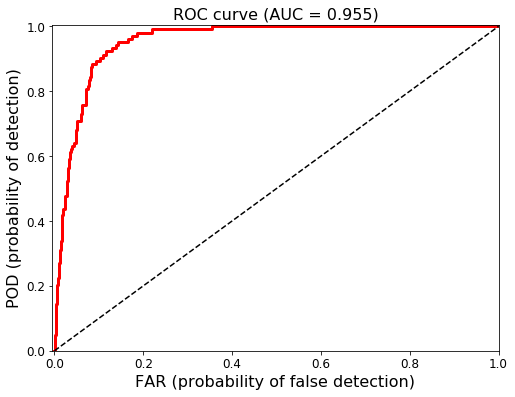

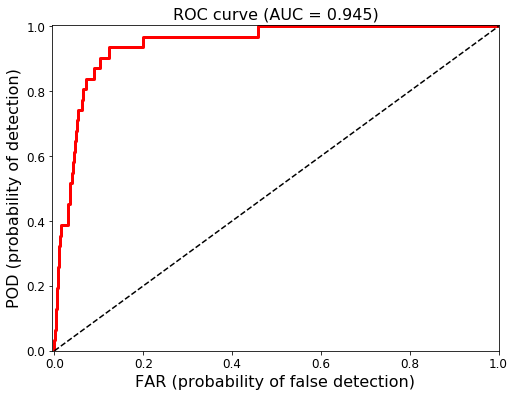

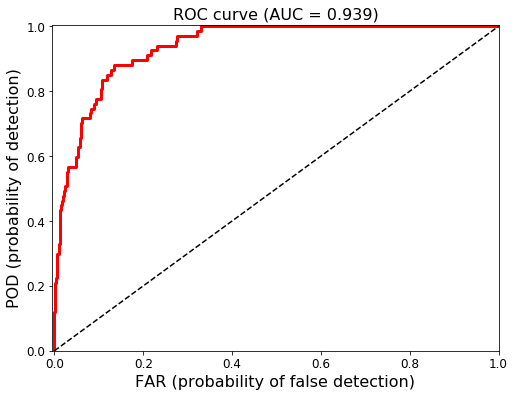

In [4]:
list_output, list_inputs, list_attention_maps = engine.predict(model, 
                                                data_loader_training, 
                                                data_loader_validate, 
                                                data_loader_testing, 
                                                Exp_name = Exp_name,)

In [5]:
Exp_name  = 'test'
data_loader_training, data_loader_validate, data_loader_testing = dataloader.return_data_loaders(configs.data_config_dict, configs.get_train_hyperparameter_config, Exp_name)
model      = transformers.VisionTransformer(configs.SparkMET_3D_config(), img_size=32, num_classes=2,).to(device)
loss_func  = torch.nn.NLLLoss() 
optimizer  = optim.Adam(model.parameters(), 
                        lr = configs.get_train_hyperparameter_config['lr'], 
                        weight_decay = configs.get_train_hyperparameter_config['wd'])

#================================ Summary of Dataset ==================#
number of training samples:   5460 | number of training fog cases:   103
number of validation samples: 2332 | number of validation fog cases: 31
number of test samples:       2228 | number of test fog cases:       67
#======================================================================#


In [6]:
model, loss_stat = engine.train(model, optimizer, loss_func,
                                        configs.get_train_hyperparameter_config,
                                        data_loader_training, 
                                        data_loader_validate, 
                                        Exp_name) 

Epoch 001: | Train Loss: 0.3701 | Val Loss: 0.1032 | Time(s): 172.438
Best model Saved! Val Loss: 0.1032
count: 0


KeyboardInterrupt: 